In [91]:

# a) Load libraries
# standard imports
import os

# Third Party Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelBinarizer


In [92]:
# Load dataset
file_path = "Diabetes.csv"
df = pd.read_csv(file_path)

In [93]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [94]:
df.shape

(1000, 14)

In [95]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [96]:
df.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

In [97]:
df['Gender'] = df['Gender'].str.upper()

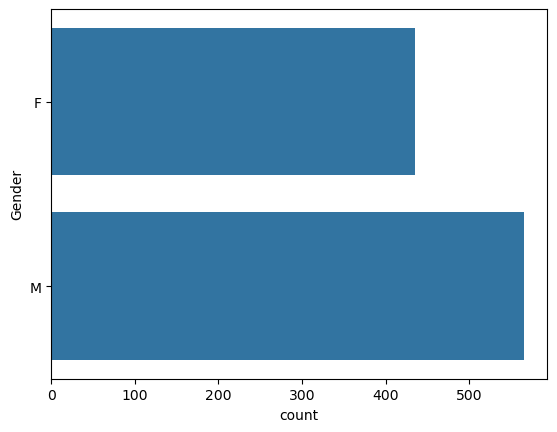

In [98]:
sns.countplot(df['Gender'])
plt.show()

In [99]:
df['CLASS'] = df['CLASS'].str.strip()
df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='CLASS'>

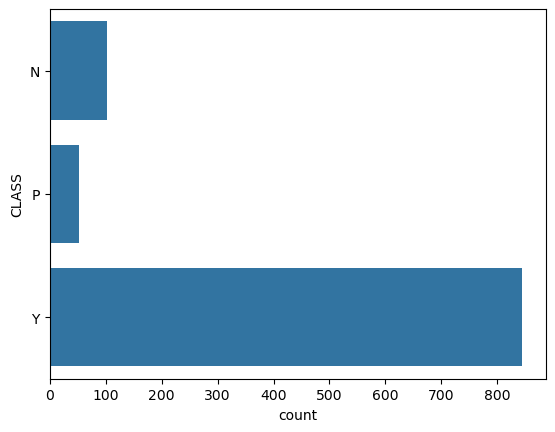

In [100]:
sns.countplot(df['CLASS'])

In [101]:
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

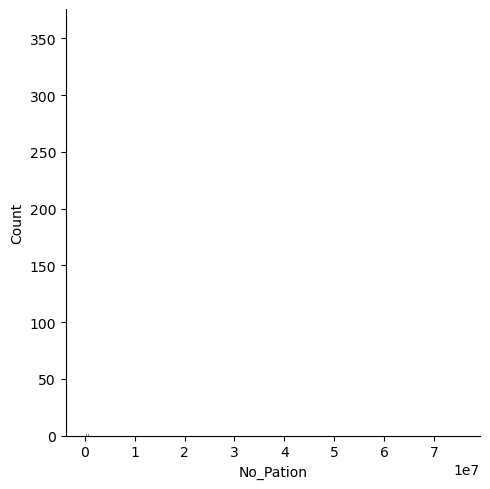

In [102]:
# Numerical attributes visualization
sns.displot(df['No_Pation'])

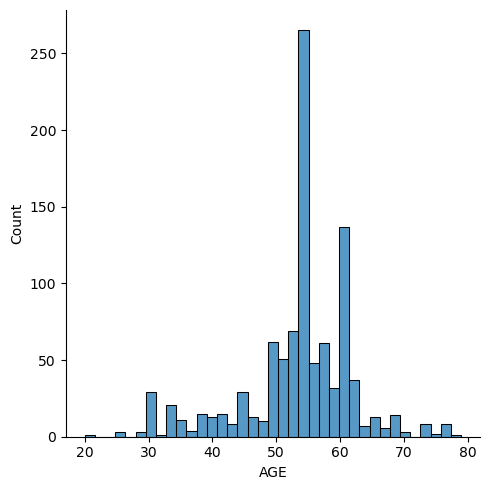

In [103]:
sns.displot(df['AGE'])

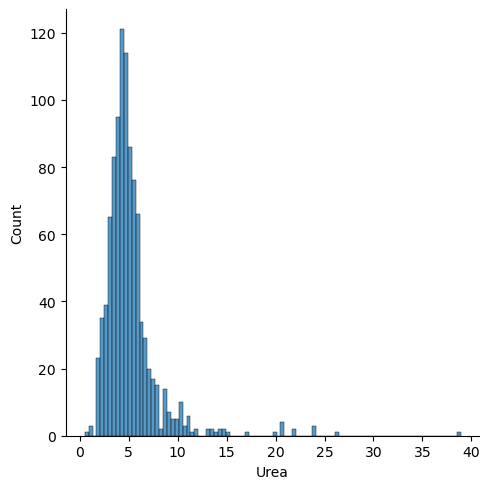

In [104]:
sns.displot(df['Urea'])

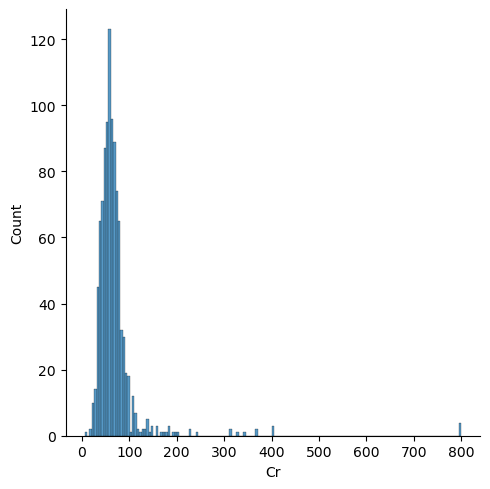

In [105]:
sns.displot(df['Cr'])

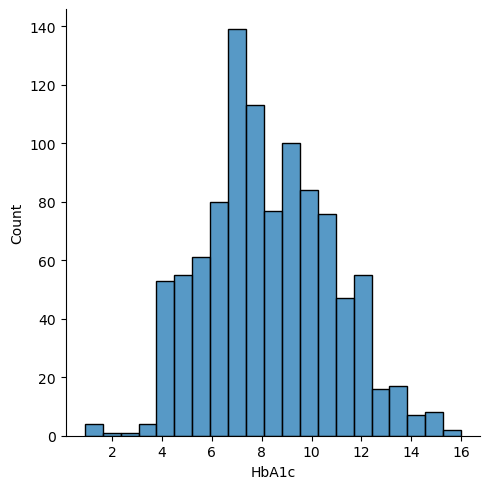

In [106]:
sns.displot(df['HbA1c'])

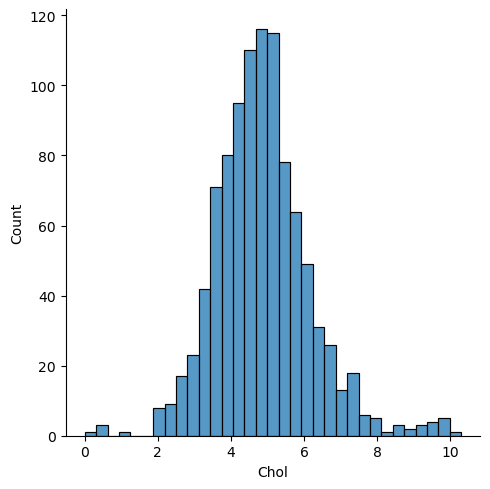

In [107]:
sns.displot(df['Chol'])

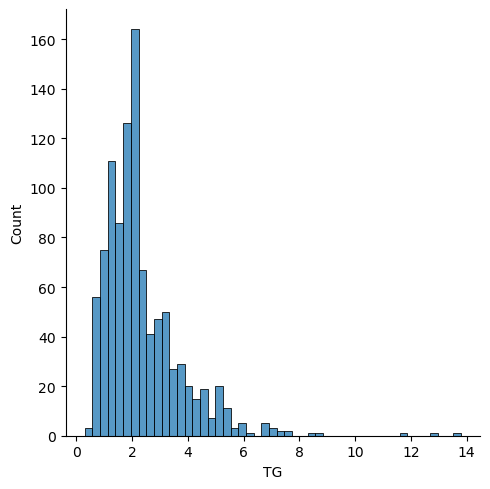

In [108]:
sns.displot(df['TG'])

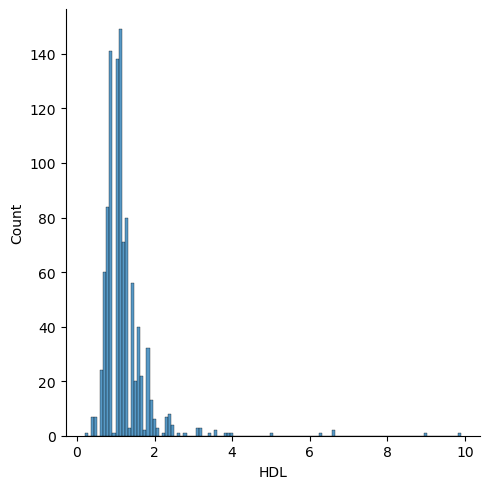

In [109]:
sns.displot(df['HDL'])

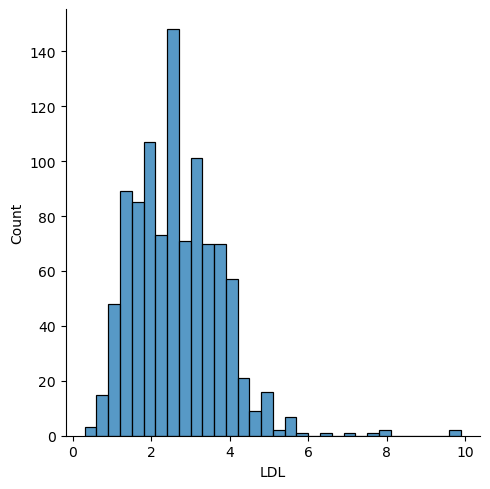

In [110]:
sns.displot(df['LDL'])

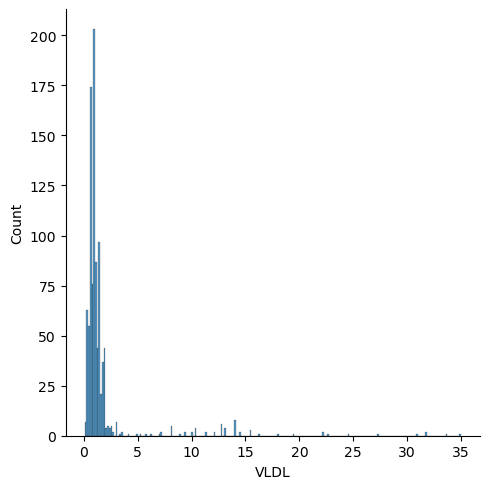

In [111]:
sns.displot(df['VLDL'])

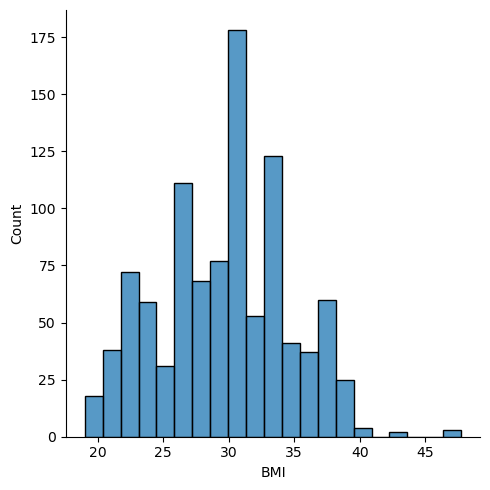

In [112]:
sns.displot(df['BMI'])

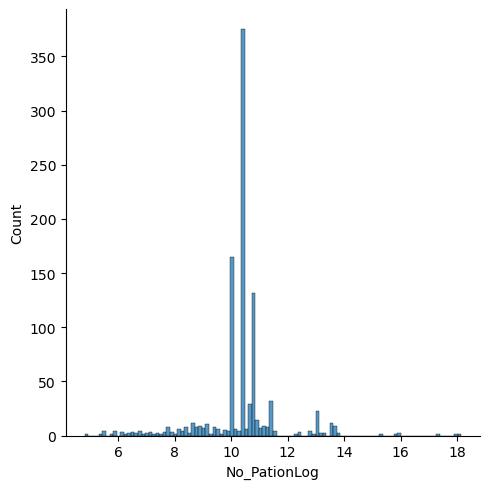

In [113]:
# Apply log transformation to the attribute
df['No_PationLog'] = np.log(df['No_Pation'])
sns.displot(df['No_PationLog'])

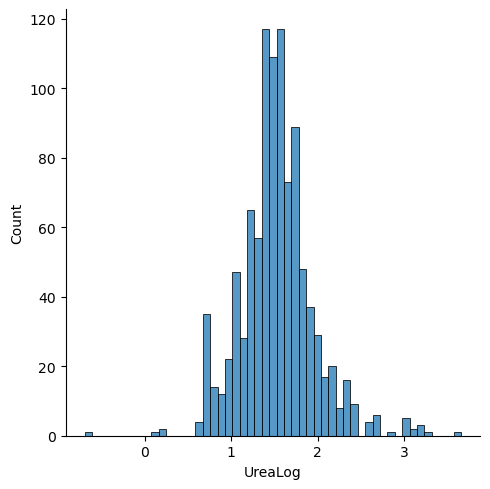

In [114]:
df['UreaLog'] = np.log(df['Urea'])
sns.displot(df['UreaLog'])

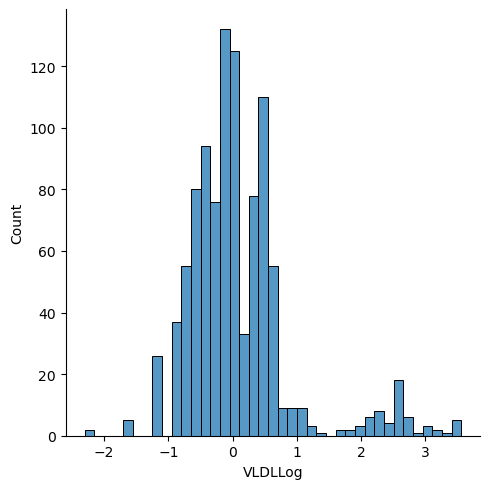

In [115]:
df['VLDLLog'] = np.log(df['VLDL'])
sns.displot(df['VLDLLog'])


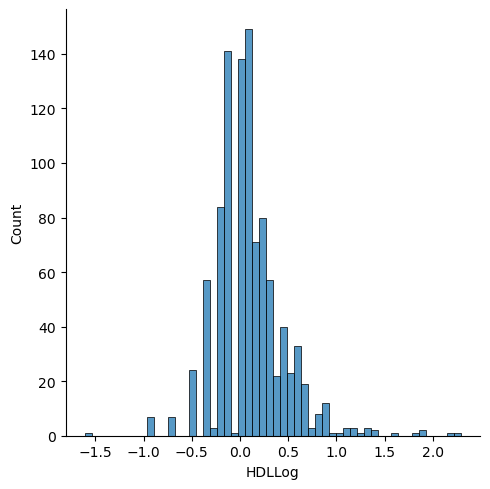

In [116]:
df['HDLLog'] = np.log(df['HDL'])
sns.displot(df['HDLLog'])

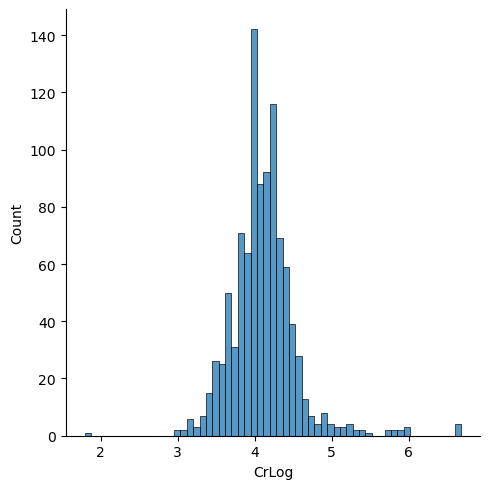

In [117]:
df['CrLog'] = np.log(df['Cr'])
sns.displot(df['CrLog'])

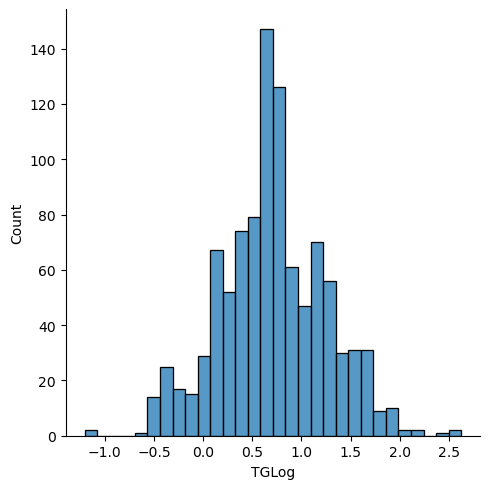

In [118]:
df['TGLog'] = np.log(df['TG'])
sns.displot(df['TGLog'])

In [119]:
# select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# calculate correlation matrix
corr_matrix = numerical_df.corr()

# display correlation matrix
corr_matrix


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,No_PationLog,UreaLog,VLDLLog,HDLLog,CrLog,TGLog
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409,0.013268,-0.078054,0.101950,0.006534,-0.111810,-0.093959
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719,0.357060,-0.014624,0.144959,-0.010530,0.019752,-0.053556
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,-0.120462,0.129648,-0.062964,-0.039868,0.069555,0.143563
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,-0.014835,0.893640,0.012301,-0.068088,0.628142,0.072921
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.020396,0.511408,0.043065,-0.043883,0.813146,0.069634
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,-0.060995,-0.005067,0.155467,-0.004507,-0.086030,0.214467
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.054652,0.006741,0.194686,0.123690,-0.008542,0.340990
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,-0.014419,0.044133,0.386232,-0.131799,0.070146,0.919340
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,0.004797,-0.024589,-0.040670,0.879626,-0.029099,-0.090272
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.064102,-0.002791,0.060877,-0.158058,0.068853,0.067134


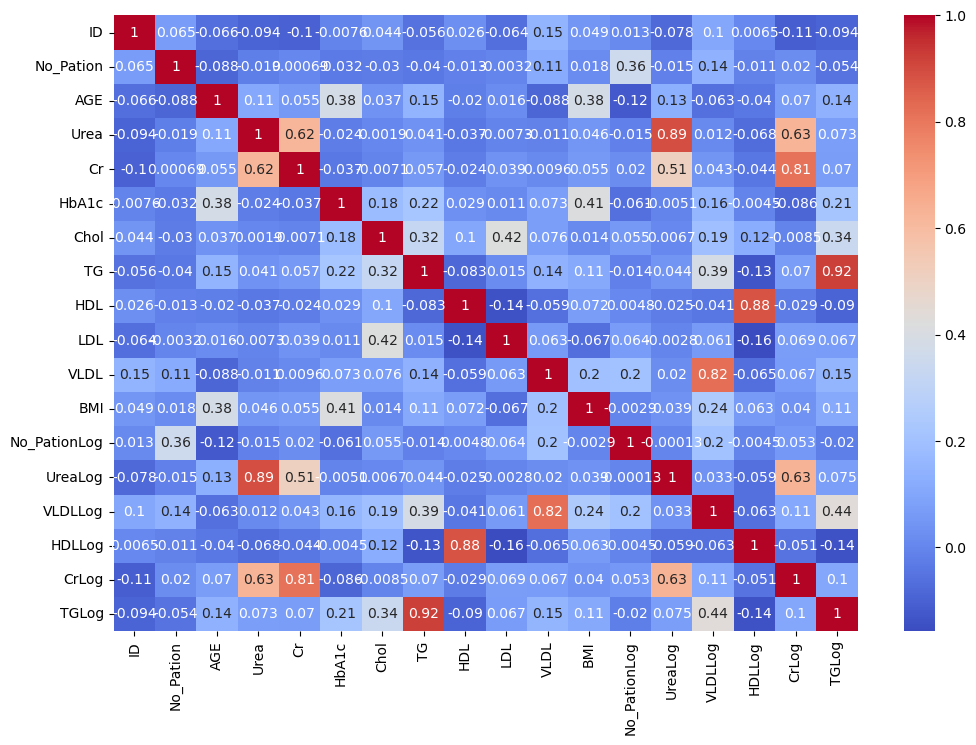

In [120]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [121]:
col = ['No_Pation', 'Urea', 'VLDL', 'HDL', 'Cr']
df = df.drop(col, axis =1)

In [122]:
df = df.drop(columns = ['TGLog'], axis = 1)

In [123]:
df.tail()

,ID,Gender,AGE,HbA1c,Chol,TG,LDL,BMI,CLASS,No_PationLog,UreaLog,VLDLLog,HDLLog,CrLog
995,200,M,71,7.0,7.5,1.7,1.8,30.0,Y,13.026550,2.397895,-0.510826,0.182322,4.574711
996,671,M,31,12.3,4.1,2.2,2.4,37.2,Y,13.683731,1.098612,2.734368,-0.356675,4.094345
997,669,M,30,6.7,4.1,1.1,2.4,27.4,Y,11.381153,1.960095,2.091864,0.182322,4.394449
998,99,M,38,6.7,5.3,2.0,2.9,40.5,Y,10.085976,1.757858,2.639057,0.470004,4.077537
999,248,M,54,6.9,3.8,1.7,3.0,33.0,Y,10.088057,1.609438,-0.356675,0.095310,4.204693


In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Gender', 'CLASS']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [125]:
df.tail()

,ID,Gender,AGE,HbA1c,Chol,TG,LDL,BMI,CLASS,No_PationLog,UreaLog,VLDLLog,HDLLog,CrLog
995,200,1,71,7.0,7.5,1.7,1.8,30.0,2,13.026550,2.397895,-0.510826,0.182322,4.574711
996,671,1,31,12.3,4.1,2.2,2.4,37.2,2,13.683731,1.098612,2.734368,-0.356675,4.094345
997,669,1,30,6.7,4.1,1.1,2.4,27.4,2,11.381153,1.960095,2.091864,0.182322,4.394449
998,99,1,38,6.7,5.3,2.0,2.9,40.5,2,10.085976,1.757858,2.639057,0.470004,4.077537
999,248,1,54,6.9,3.8,1.7,3.0,33.0,2,10.088057,1.609438,-0.356675,0.095310,4.204693


In [126]:
target_variable = 'CLASS'
feature_names = [col for col in df.columns if col != target_variable]


# --- Data Splitting by specifying the input and output---
X = df[feature_names].values
y = df[target_variable].values

In [127]:
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)

# --- Feature Scaling (Important for some methods) ---

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
result = model.score(X_test_scaled, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(np.mean(result))

Accuracy: 93.000%
0.93


In [128]:
X_train_scaled[:5]

array([[-1.14070708, -1.13677773,  1.53204454,  1.92945306, -0.35568283,
        -0.24656135, -0.10078595, -0.10577387, -0.1888797 , -0.08558527,
        -0.2097394 , -0.27712537, -0.184016  ],
       [-0.83886063, -1.13677773,  0.377092  , -2.89838416, -1.2691051 ,
        -0.75422499,  0.35046074, -1.51451569,  0.29353389, -0.03473088,
         0.04510948, -0.55731342,  1.10109396],
       [-1.31678418,  0.87967944, -1.00885104,  0.78185241, -0.05120874,
        -0.75422499,  0.62120875,  0.96084494, -0.18932123, -0.30097619,
         2.78317493, -0.55731342,  0.09151252],
       [-1.15328402, -1.13677773,  1.41654929,  0.6631351 , -0.35568283,
        -0.24656135, -0.10078595, -0.10577387, -0.18891123,  0.37872292,
        -0.2097394 , -0.27712537, -0.184016  ],
       [ 1.00994887,  0.87967944,  0.83907302,  0.30698317, -1.49746067,
        -1.18936525, -0.91302998,  1.30296795,  0.08627974,  1.00190054,
        -1.60496111, -0.27712537,  0.49937542]])

In [129]:
from sklearn?

Object `sklearn` not found.


In [130]:
from sklearn.pipeline import Pipeline

ScaledLR: 0.916250 (0.027415)
LDA: 0.885000 (0.031524)
KNN: 0.911250 (0.023352)
CART: 0.982500 (0.015000)
NB: 0.936250 (0.032331)
SVM: 0.928750 (0.025648)


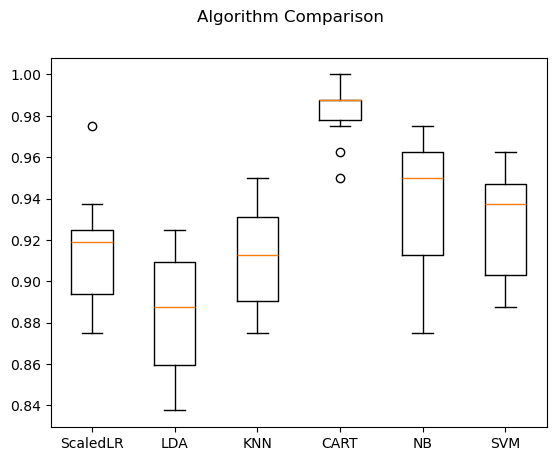

In [131]:
# prepare models
models = []
models.append(('ScaledLR', Pipeline([('Scaler', LogisticRegression())]))) # this is the only model with the scaler object while the rest of the model did not perform the data standardization
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ScaledLR: 0.916250 (0.027415)
ScaledLDA: 0.885000 (0.031524)
ScaledKNN: 0.911250 (0.023352)
ScaledCART: 0.987500 (0.014790)
ScaledNB: 0.936250 (0.032331)
ScaledSVM: 0.928750 (0.025648)


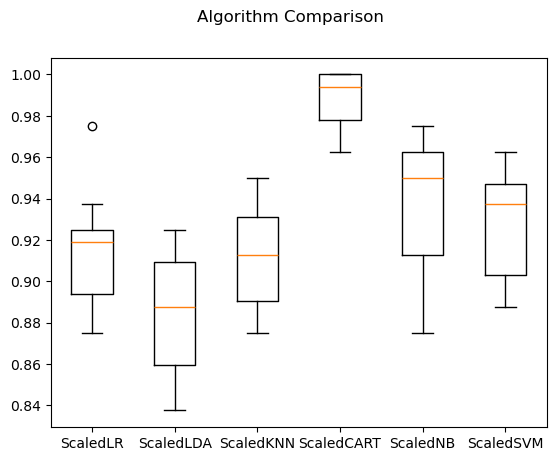

In [132]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', SVC())])))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [133]:
# Scaling the data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# Define the hyperparameter grid for Logistic Regression
param_grid = [
    {'penalty': ['l1'], 'C': np.logspace(-3, 3, 7), 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
    {'penalty': ['l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': [None, 'balanced']},
    {'penalty': ['elasticnet'], 'C': np.logspace(-3, 3, 7), 'solver': ['saga'], 'l1_ratio': np.linspace(0, 1, 5), 'class_weight': [None, 'balanced']},
    {'penalty': [None], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': [None, 'balanced']}
]

# Define the cross-validation strategy
num_folds = 5  # You can adjust this
seed = 7      # You can adjust this
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=seed)

# Initialize GridSearchCV
scoring = 'accuracy'  # Define your scoring metric
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

# Fit the GridSearchCV object
grid_result = grid.fit(rescaledX, Y_train)

# Print the results
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.917500 using {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [135]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostClassifier(algorithm='SAMME'))])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
     kfold = KFold(n_splits=num_folds, random_state=seed, shuffle =True)
     cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

ScaledAB: 0.945000 (0.014470)
ScaledGBM: 0.985000 (0.006374)
ScaledRF: 0.981250 (0.013693)
ScaledET: 0.960000 (0.017048)


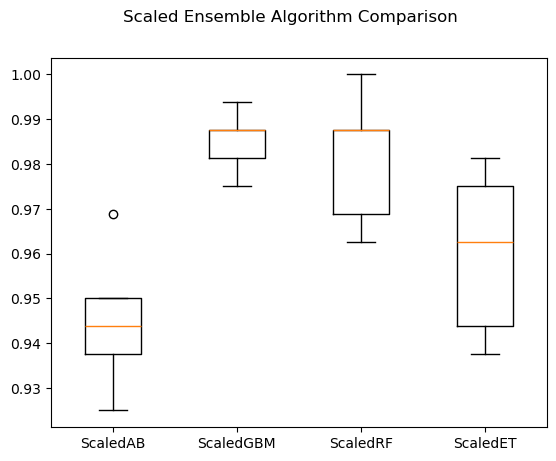

In [136]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [137]:
# Define the parameter grid
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],  # Example weak learners
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME'],  # Important: explicitly set to 'SAMME'
    'random_state': [42]
}

# Create AdaBoostClassifier
model = AdaBoostClassifier()

# Create KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)

# Fit GridSearchCV
grid_result = grid_search.fit(rescaledX, Y_train)

# Print results
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 0.9875
Test Accuracy: 0.985


In [138]:
# Create AdaBoostClassifier
model = AdaBoostClassifier(algorithm = 'SAMME', estimator = DecisionTreeClassifier(max_depth=1), learning_rate = 0.01, n_estimators = 50, random_state = 42)
model.fit(rescaledX, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, random_state=42)

In [143]:
from imblearn.over_sampling import SMOTE
X = df[feature_names].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)
y_pred = nb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        21
           1       1.00      1.00      1.00         6
           2       0.99      0.95      0.97       173

    accuracy                           0.95       200
   macro avg       0.89      0.97      0.92       200
weighted avg       0.96      0.95      0.95       200

[[ 20   0   1]
 [  0   6   0]
 [  9   0 164]]


<Axes: >

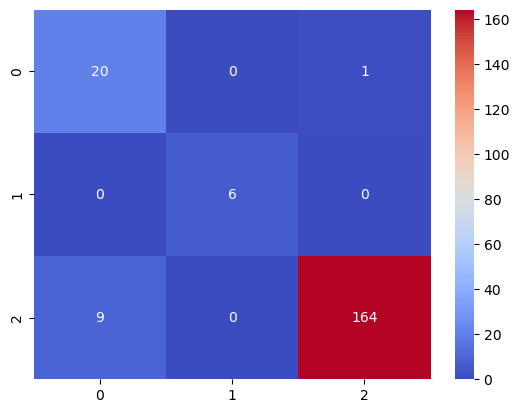

In [147]:
sns.heatmap(data = confusion_matrix(y_test, y_pred), annot = True, fmt= 'd', cmap = 'coolwarm')

In [156]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
# plt.hist(y_pred, bins = 10)
# plt.xlim(0, 1)
# plt.show()
y_pred
len(y_pred)
len(X_test)
df.head()

,ID,Gender,AGE,HbA1c,Chol,TG,LDL,BMI,CLASS,No_PationLog,UreaLog,VLDLLog,HDLLog,CrLog
0,502,0,50,4.9,4.2,0.9,1.4,24.0,0,9.796737,1.547563,-0.693147,0.875469,3.828641
1,735,1,26,4.9,3.7,1.4,2.1,23.0,0,10.440595,1.504077,-0.510826,0.095310,4.127134
2,420,0,50,4.9,4.2,0.9,1.4,24.0,0,10.778435,1.547563,-0.693147,0.875469,3.828641
3,680,0,50,4.9,4.2,0.9,1.4,24.0,0,11.381175,1.547563,-0.693147,0.875469,3.828641
4,504,1,33,4.9,4.9,1.0,2.0,21.0,0,10.440653,1.960095,-0.916291,-0.223144,3.828641
